
# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
df=pd.read_csv("synthetic_traffic_data.csv")

In [3]:
df.head()


,date,time,hour,day_of_week,day_name,vehicle_count,congestion_level,congestion_duration_minutes,is_weekend,weather,temperature,visibility
0,2025-09-01,00:00,0,0,Monday,7,Low,9,0,Clear,23.829233,5.290418
1,2025-09-01,01:00,1,0,Monday,2,Low,10,0,Fog,22.374151,10.000000
2,2025-09-01,02:00,2,0,Monday,0,Low,7,0,Light Rain,29.082225,10.000000
3,2025-09-01,03:00,3,0,Monday,0,Low,8,0,Clear,14.301897,10.000000
4,2025-09-01,04:00,4,0,Monday,0,Low,11,0,Clear,25.611096,5.852621


In [4]:
df.shape


(168, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         168 non-null    object 
 1   time                         168 non-null    object 
 2   hour                         168 non-null    int64  
 3   day_of_week                  168 non-null    int64  
 4   day_name                     168 non-null    object 
 5   vehicle_count                168 non-null    int64  
 6   congestion_level             168 non-null    object 
 7   congestion_duration_minutes  168 non-null    int64  
 8   is_weekend                   168 non-null    int64  
 9   weather                      168 non-null    object 
 10  temperature                  168 non-null    float64
 11  visibility                   168 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 15.9+ KB


In [6]:
#Data Cleaning
#EDA---+
#Model Building
#Evaluation
#Improvement
#Deploy

# Data Cleaning

In [7]:
df.drop(columns=["temperature","visibility","congestion_duration_minutes","day_name","time","date"], inplace=True)

In [8]:
df.head()

,hour,day_of_week,vehicle_count,congestion_level,is_weekend,weather
0,0,0,7,Low,0,Clear
1,1,0,2,Low,0,Fog
2,2,0,0,Low,0,Light Rain
3,3,0,0,Low,0,Clear
4,4,0,0,Low,0,Clear


In [9]:
df.head(-5)

,hour,day_of_week,vehicle_count,congestion_level,is_weekend,weather
0,0,0,7,Low,0,Clear
1,1,0,2,Low,0,Fog
2,2,0,0,Low,0,Light Rain
3,3,0,0,Low,0,Clear
4,4,0,0,Low,0,Clear
...,...,...,...,...,...,...
158,14,6,43,Medium,1,Light Rain
159,15,6,35,Medium,1,Clear
160,16,6,46,Medium,1,Heavy Rain
161,17,6,53,High,1,Light Rain


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['weather']=encoder.fit_transform(df['weather'])

In [12]:
df.head()

,hour,day_of_week,vehicle_count,congestion_level,is_weekend,weather
0,0,0,7,Low,0,0
1,1,0,2,Low,0,1
2,2,0,0,Low,0,3
3,3,0,0,Low,0,0
4,4,0,0,Low,0,0


In [13]:
#missing values
df.isnull().sum()

hour                0
day_of_week         0
vehicle_count       0
congestion_level    0
is_weekend          0
weather             0
dtype: int64

In [14]:
df.duplicated().sum()
df=df.drop_duplicates(keep="first")

In [15]:
from sklearn.model_selection import train_test_split

# Assuming df is your cleaned DataFrame:
X = df[['hour', 'day_of_week', 'vehicle_count', 'weather']]
y = df['congestion_level']

# Stratified split to maintain class balance in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Show overall class distribution
print("Overall class distribution:")
print(y.value_counts(normalize=True).apply(lambda x: f"{x*100:.1f}%"))

# Show training set distribution
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True).apply(lambda x: f"{x*100:.1f}%"))

# Show test set distribution
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True).apply(lambda x: f"{x*100:.1f}%"))


Overall class distribution:
congestion_level
Low       38.7%
Medium    31.5%
High      29.8%
Name: proportion, dtype: object

Training set class distribution:
congestion_level
Low       38.5%
Medium    31.6%
High      29.9%
Name: proportion, dtype: object

Test set class distribution:
congestion_level
Low       39.2%
Medium    31.4%
High      29.4%
Name: proportion, dtype: object


# 










EDA

In [16]:
# 1. Correlation of features with congestion level (after encoding congestion)
from sklearn.preprocessing import LabelEncoder

le_congestion = LabelEncoder()
df['congestion_encoded'] = le_congestion.fit_transform(df['congestion_level'])

correlations = df[['vehicle_count', 'hour', 'day_of_week', 'congestion_encoded']].corr()
print('Correlation with congestion:')
print(correlations['congestion_encoded'].sort_values(ascending=False))

Correlation with congestion:
congestion_encoded    1.000000
day_of_week           0.273742
hour                 -0.082936
vehicle_count        -0.455806
Name: congestion_encoded, dtype: float64


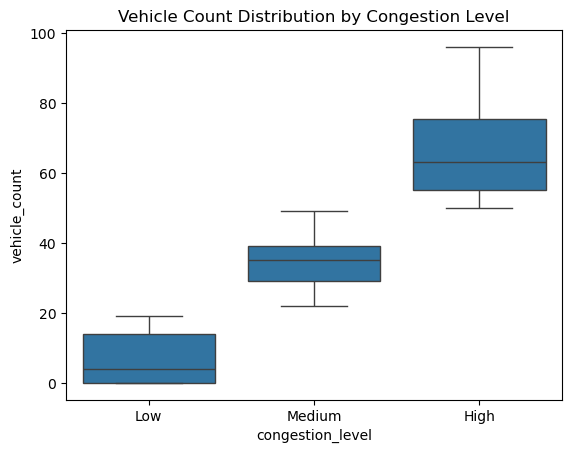

In [17]:

# 2. Plot vehicle_count distribution by congestion level (boxplot)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='congestion_level', y='vehicle_count', data=df)
plt.title('Vehicle Count Distribution by Congestion Level')
plt.show()

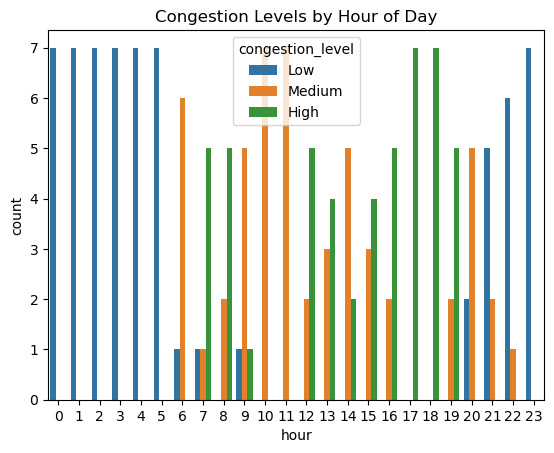

In [18]:
# 3. Visualize congestion counts per hour to highlight rush hour patterns
sns.countplot(x='hour', hue='congestion_level', data=df)
plt.title('Congestion Levels by Hour of Day')
plt.show()

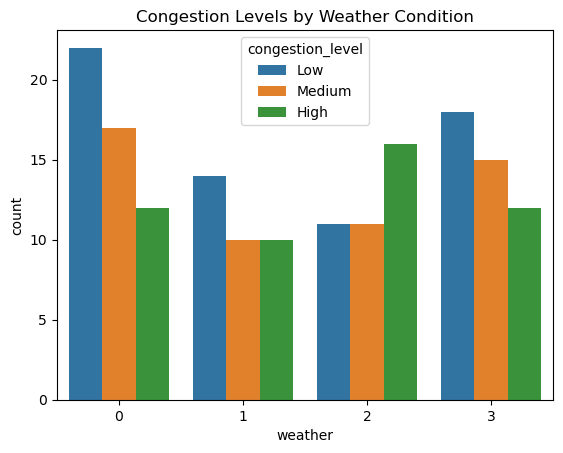

In [19]:
# 4. Visualize congestion counts by weather condition
sns.countplot(x='weather', hue='congestion_level', data=df)
plt.title('Congestion Levels by Weather Condition')
plt.show()
# here 0-Clear,1-fog,2-Heavy-rain,3-Light-rain

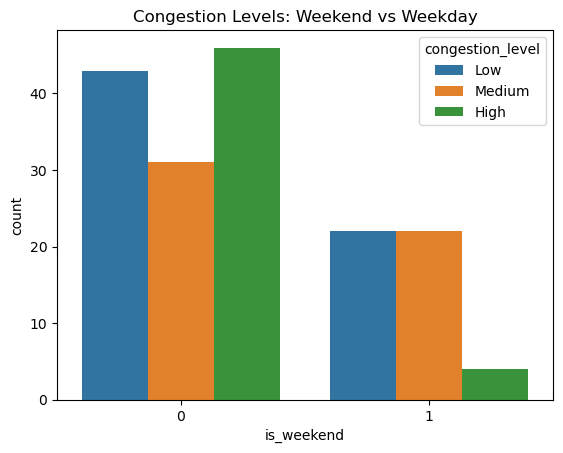

In [20]:
sns.countplot(x='is_weekend', hue='congestion_level', data=df)
plt.title('Congestion Levels: Weekend vs Weekday')
plt.show()


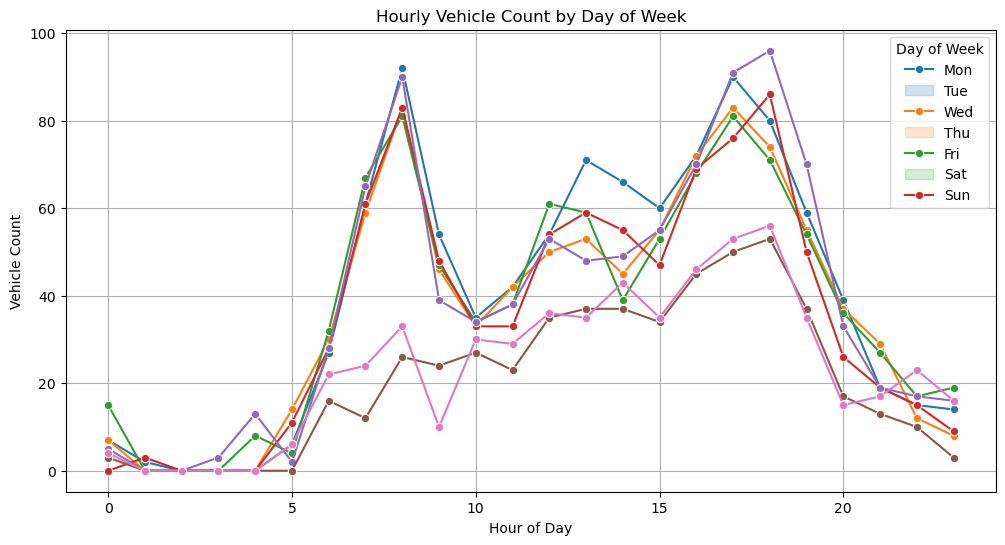

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='hour',
    y='vehicle_count',
    hue='day_of_week',
    palette='tab10',
    marker='o'
)
plt.title('Hourly Vehicle Count by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Vehicle Count')
plt.legend(title='Day of Week', labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()


C:\Users\Kartik\AppData\Local\Temp\ipykernel_17680\3233238815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


<Figure size 1800x1000 with 0 Axes>

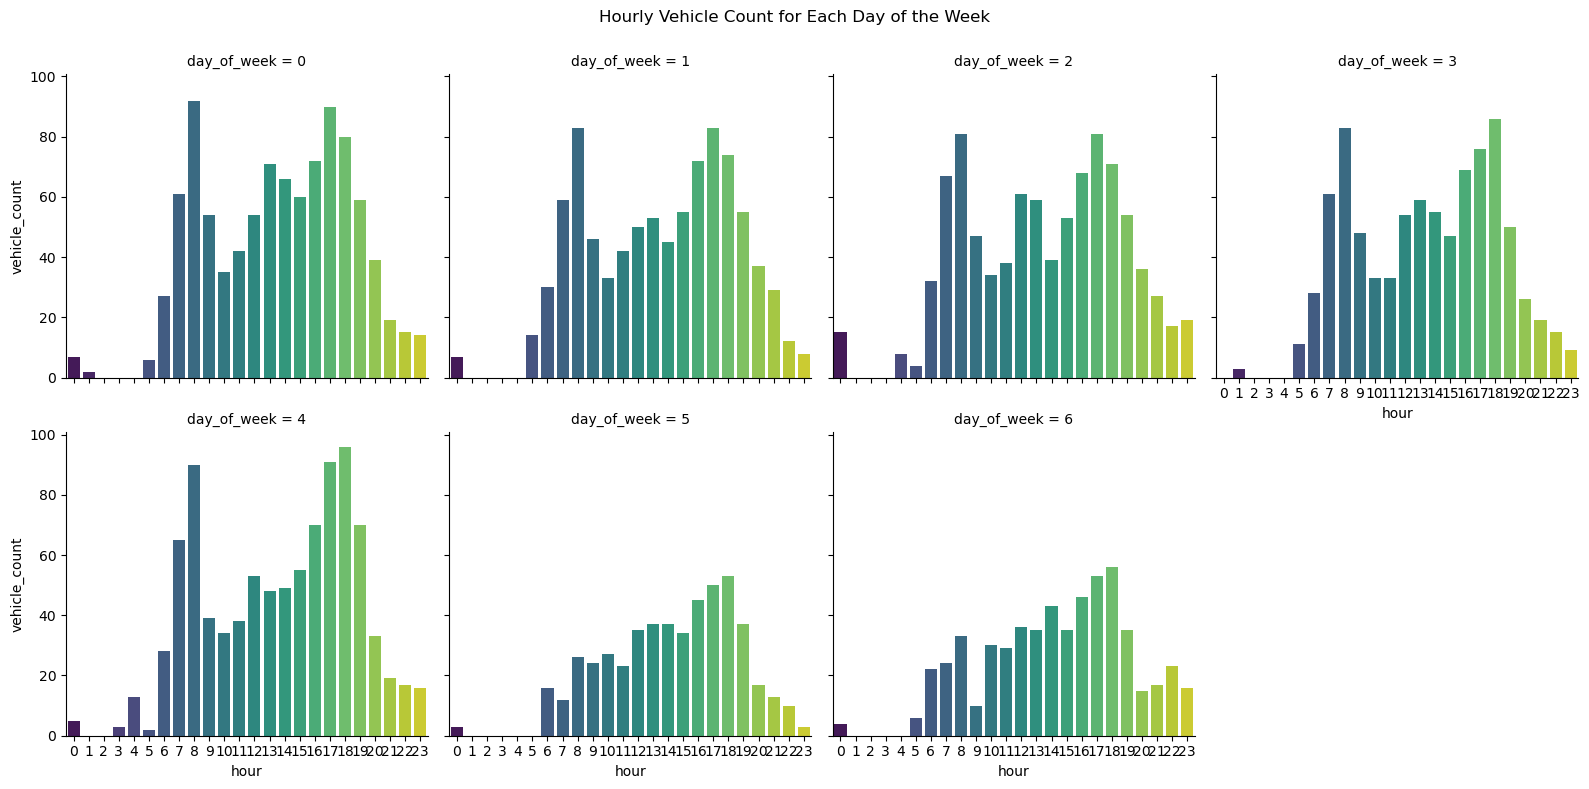

In [22]:
plt.figure(figsize=(18, 10))
sns.catplot(
    data=df,
    x='hour',
    y='vehicle_count',
    col='day_of_week',
    kind='bar',
    col_wrap=4,
    height=4,
    aspect=1,
    palette='viridis'
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly Vehicle Count for Each Day of the Week')
plt.show()


# Model Building and Evaluation

In [23]:
# Step 1: Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

In [24]:
# Step 2: Prepare features and target from your cleaned DataFrame (df_clean)
from sklearn.preprocessing import LabelEncoder

# 1. Encode 'weather' before creating df_clean
encoder = LabelEncoder()
df['weather_encoded'] = encoder.fit_transform(df['weather'])

# 2. Now create 'df_clean' with the encoded column included
df_clean = df[['hour', 'day_of_week', 'vehicle_count', 'weather_encoded', 'congestion_level']].copy()

# 3. Select features and target for modeling
X = df_clean[['hour', 'day_of_week', 'vehicle_count', 'weather_encoded']]
y = df_clean['congestion_level']


In [25]:
# Step 3: Split dataset into train and test with stratified sampling to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [26]:
# Step 4: Initialize Random Forest Classifier with optimized hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,          
    max_depth=10,              
    min_samples_split=5,  
    min_samples_leaf=2,  
    max_features='sqrt',       
    class_weight='balanced',  
    random_state=42,           
    n_jobs=-1                  
)

In [27]:

# Step 5: Train the model on training data
rf_model.fit(X_train, y_train)


# Step 6: Predict on test data
y_pred = rf_model.predict(X_test)


# Step 7: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy*100:.2f}%')


Test Accuracy: 100.00%


In [28]:
# Step 8: Evaluate cross-validation score with stratified K-fold (5 folds)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f'Cross-Validation Accuracy: {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*2:.2f})')


Cross-Validation Accuracy: 100.00% (+/- 0.00)


In [29]:
# Step 9: Print the classification report (Precision, Recall, F1)
print('Classification Report:')
print(classification_report(y_test, y_pred))


# Step 10: Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       1.00      1.00      1.00        20
      Medium       1.00      1.00      1.00        16

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

Confusion Matrix:
[[15  0  0]
 [ 0 20  0]
 [ 0  0 16]]


In [30]:
# Step 11: Feature importance analysis
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importances (%):')
for feature, importance in feature_importances.items():
    print(f'{feature}: {importance*100:.2f}%')

Feature Importances (%):
vehicle_count: 73.90%
hour: 21.62%
day_of_week: 3.87%
weather_encoded: 0.61%


# Model Testing

In [31]:
# Step 1: Define sample test scenarios
test_scenarios = [
    {'hour': 8, 'day_of_week': 0, 'vehicle_count': 85, 'weather': 'Clear', 'desc': 'Monday 8AM'},
    {'hour': 18, 'day_of_week': 4, 'vehicle_count': 90, 'weather': 'Heavy Rain', 'desc': 'Friday 6PM'},
    {'hour': 14, 'day_of_week': 6, 'vehicle_count': 25, 'weather': 'Clear', 'desc': 'Sunday 2PM'},
    {'hour': 2, 'day_of_week': 2, 'vehicle_count': 5, 'weather': 'Fog', 'desc': 'Wednesday 2AM'}
]

# Step 2: For weather encoding, use the LabelEncoder you trained before
# Example: encoder = LabelEncoder()
# encoder.fit(df['weather'])

# Step 3: Loop through each scenario and predict
for scenario in test_scenarios:
    # Encode weather
    try:
        weather_encoded = encoder.transform([scenario['weather']])[0]
    except ValueError:
        weather_encoded = 0  # Default to 'Clear' if unknown
    
    # Prepare feature array
    features = [[
        scenario['hour'],
        scenario['day_of_week'],
        scenario['vehicle_count'],
        weather_encoded
    ]]
    
    # Make prediction
    prediction = rf_model.predict(features)[0]
    confidence_scores = rf_model.predict_proba(features)[0]
    
    # Map class probabilities to congestion labels
    class_labels = rf_model.classes_
    confidence_dict = {label: f"{conf*100:.1f}%" for label, conf in zip(class_labels, confidence_scores)}
    
    # Print results
    print(f"{scenario['desc']} → Predicted Congestion: {prediction} (Confidence: {confidence_dict})")


C:\Users\Kartik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kartik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Monday 8AM → Predicted Congestion: High (Confidence: {'High': '96.6%', 'Low': '0.1%', 'Medium': '3.3%'})


C:\Users\Kartik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kartik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Friday 6PM → Predicted Congestion: High (Confidence: {'High': '98.0%', 'Low': '0.0%', 'Medium': '2.0%'})


C:\Users\Kartik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kartik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Sunday 2PM → Predicted Congestion: Medium (Confidence: {'High': '0.2%', 'Low': '1.9%', 'Medium': '97.9%'})


C:\Users\Kartik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kartik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Wednesday 2AM → Predicted Congestion: Low (Confidence: {'High': '0.0%', 'Low': '100.0%', 'Medium': '0.0%'})


# Model Improvement Analysis

In [32]:
import pandas as pd
import numpy as np

# Load your dataset first (replace filename if needed)
df = pd.read_csv('synthetic_traffic_data.csv')

# Add rush hour binary indicator (7-9am and 5-7pm)
df['is_rush_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)

# Create weekend vs weekday feature (Saturday=5, Sunday=6 as weekend)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Weather severity scoring (1=Clear, 4=Heavy Rain)
weather_severity_map = {'Clear': 1, 'Fog': 2, 'Light Rain': 3, 'Heavy Rain': 4}
df['weather_severity'] = df['weather'].map(weather_severity_map)

# Add cyclical time features for hour and day_of_week
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# Preview the added features
print(df[['hour', 'is_rush_hour', 'day_of_week', 'is_weekend', 'weather', 'weather_severity', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos']].head())


   hour  is_rush_hour  day_of_week  is_weekend     weather  weather_severity  \
0     0             0            0           0       Clear                 1   
1     1             0            0           0         Fog                 2   
2     2             0            0           0  Light Rain                 3   
3     3             0            0           0       Clear                 1   
4     4             0            0           0       Clear                 1   

   hour_sin  hour_cos  day_sin  day_cos  
0  0.000000  1.000000      0.0      1.0  
1  0.258819  0.965926      0.0      1.0  
2  0.500000  0.866025      0.0      1.0  
3  0.707107  0.707107      0.0      1.0  
4  0.866025  0.500000      0.0      1.0  
